In [2]:
import lightgbm as lgb, xgboost as xgb

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Load train and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Quick facts about the data
print('Train shape:', train.shape)
print('Test shape:', test.shape)
print('\nTrain columns:', train.columns.tolist())
print('\nFirst 5 rows of train:')
print('\nMissing values in train:')
display(train.isnull().sum()[train.isnull().sum() > 0])

# Possible features (excluding ID and target)
features = [col for col in train.columns if col not in ['Id', 'SalePrice']]
print('\nPossible features:', features)


Train shape: (1460, 81)
Test shape: (1459, 80)

Train columns: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'E

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Missing values in train:


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Possible features: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolA

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2905
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 35
[LightGBM] [Info] Start training from score 181441.541952
LightGBM RMSE: 30139.8215


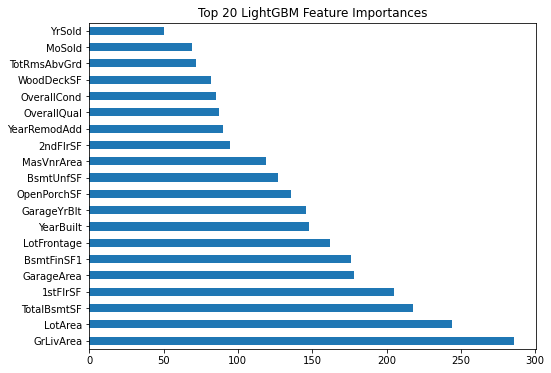

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb

# Prepare data
X = train[features]
y = train['SalePrice']

# Simple numeric feature selection for demo (drop non-numeric columns)
X = X.select_dtypes(include=['number'])
test_X = test[X.columns]

# Split train/validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_val)
lgb_rmse = mean_squared_error(y_val, lgb_pred, squared=False)
print(f'LightGBM RMSE: {lgb_rmse:.4f}')

# # XGBoost
# xgb_model = xgb.XGBRegressor(random_state=42)
# xgb_model.fit(X_train, y_train)
# xgb_pred = xgb_model.predict(X_val)
# xgb_rmse = mean_squared_error(y_val, xgb_pred, squared=False)
# print(f'XGBoost RMSE: {xgb_rmse:.4f}')

# For LightGBM
lgb_importances = pd.Series(lgb_model.feature_importances_, index=X_train.columns)
lgb_importances.nlargest(20).plot(kind='barh', figsize=(8, 6))
plt.title('Top 20 LightGBM Feature Importances')
plt.show()

# # For XGBoost
# xgb_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
# xgb_importances.nlargest(20).plot(kind='barh', figsize=(8, 6))
# plt.title('Top 20 XGBoost Feature Importances')
# plt.show()

In [ ]:
# --- Feature Engineering ---
def feature_engineering(df):
    df = df.copy()
    
    # Total square footage
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GrLivArea'] + df['GarageArea']
    # Age of house
    df['HouseAge'] = df['YrSold'] - df['YearBuilt']
    # Age since remodel
    df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
    # Is remodeled
    df['IsRemodeled'] = (df['YearRemodAdd'] != df['YearBuilt']).astype(int)
    # Total bathrooms
    df['TotalBath'] = (
        df['FullBath'] + 0.5 * df['HalfBath'] +
        df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
    )
    # Interaction feature
    df['GrLivArea_OverallQual'] = df['GrLivArea'] * df['OverallQual']

    # Log transform area features to control skewness
    for area_col in ['TotalSF', 'GrLivArea', 'LotArea', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'GarageArea']:
        df[f'log_{area_col}'] = np.log1p(df[area_col])

    return df

# Apply feature engineering to train and test
df_train_fe = feature_engineering(train).drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1)
df_test_fe = feature_engineering(test).drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1)

# Fill missing values (simple median for numeric, mode for categorical)
for col in df_train_fe.columns:
    if df_train_fe[col].dtype == 'object':
        mode = df_train_fe[col].mode()[0]
        df_train_fe[col] = df_train_fe[col].fillna(mode)
        if col in df_test_fe.columns:
           df_test_fe[col] = df_test_fe[col].fillna(mode)
    else:
        median = df_train_fe[col].median()
        df_train_fe[col] = df_train_fe[col].fillna(median)
        if col in df_test_fe.columns:
            df_test_fe[col] = df_test_fe[col].fillna(median)

# One-hot encode categoricals
X_fe = pd.get_dummies(df_train_fe.drop(['Id', 'SalePrice'], axis=1))
test_X_fe = pd.get_dummies(df_test_fe.drop(['Id'], axis=1))

# Align columns
X_fe, test_X_fe = X_fe.align(test_X_fe, join='left', axis=1, fill_value=0)
y_fe = df_train_fe['SalePrice']

# Log-transform target
import numpy as np
# y_fe_log = np.log1p(y_fe)

# Split train/validation
from sklearn.model_selection import train_test_split
X_train_fe, X_val_fe, y_train_fe, y_val_fe = train_test_split(X_fe, y_fe, test_size=0.25, random_state=84)

# LightGBM
import lightgbm as lgb
from itertools import product
# You can customize these hyperparameters for the LightGBM model:
# Define grid for hyperparameters (3 choices each)
param_grid = {
    'n_estimators': [200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 127, 255],
    'min_child_samples': [10, 20, 30],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5]
}

# Use all combinations in the param_grid for grid search
search_params = param_grid

# Print total number of combinations
total_combinations = 1
for v in search_params.values():
    total_combinations *= len(v)
print(f"Total number of combinations: {total_combinations}")

# Prepare all combinations
keys, values = zip(*search_params.items())
combinations = [dict(zip(keys, v)) for v in product(*values)]

results = []
for params in combinations:
    lgb_model_fe = lgb.LGBMRegressor(
        random_state=84,
        n_estimators=params['n_estimators'],
        learning_rate=params['learning_rate'],
        num_leaves=params['num_leaves'],
        max_depth=-1,
        min_child_samples=20,
        reg_alpha=0.1,
        reg_lambda=0.1,
        verbose=-1
    )
    lgb_model_fe.fit(X_train_fe, y_train_fe)
    lgb_pred_fe = lgb_model_fe.predict(X_val_fe)
    lgb_rmse_fe = mean_squared_error(y_val_fe, lgb_pred_fe)
    results.append((params, lgb_rmse_fe))
    # Print params and RMSE, highlight if this is the best so far
    if not results or lgb_rmse_fe < min(r[1] for r in results):
        print(f"\033[92mParams: {params}, RMSE: {lgb_rmse_fe:.4f} <-- BEST SO FAR\033[0m")
    else:
        print(f"Params: {params}, RMSE: {lgb_rmse_fe:.4f}")

# Find best params
best_params, best_rmse = min(results, key=lambda x: x[1])
print(f"\nBest params: {best_params}, Best RMSE: {best_rmse:.4f}")

# Train final model with best params
lgb_model_fe = lgb.LGBMRegressor(
    random_state=84,
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    num_leaves=best_params['num_leaves'],
    max_depth=-1,
    min_child_samples=20,
    reg_alpha=0.1,
    reg_lambda=0.1,
    verbose=-1
)
lgb_model_fe.fit(X_train_fe, y_train_fe)
lgb_pred_fe = lgb_model_fe.predict(X_val_fe)
lgb_rmse_fe = mean_squared_error(y_val_fe, lgb_pred_fe, squared=False)
print(f'Final LightGBM RMSE (best params): {lgb_rmse_fe:.4f}')

# Feature importances
lgb_importances = pd.Series(lgb_model_fe.feature_importances_, index=X_train_fe.columns)
lgb_importances.nlargest(40).plot(kind='barh', figsize=(12, 10))
plt.title('Top 40 LightGBM Feature Importances')
plt.show()





LightGBM RMSE (top 50 features): 22071.4095


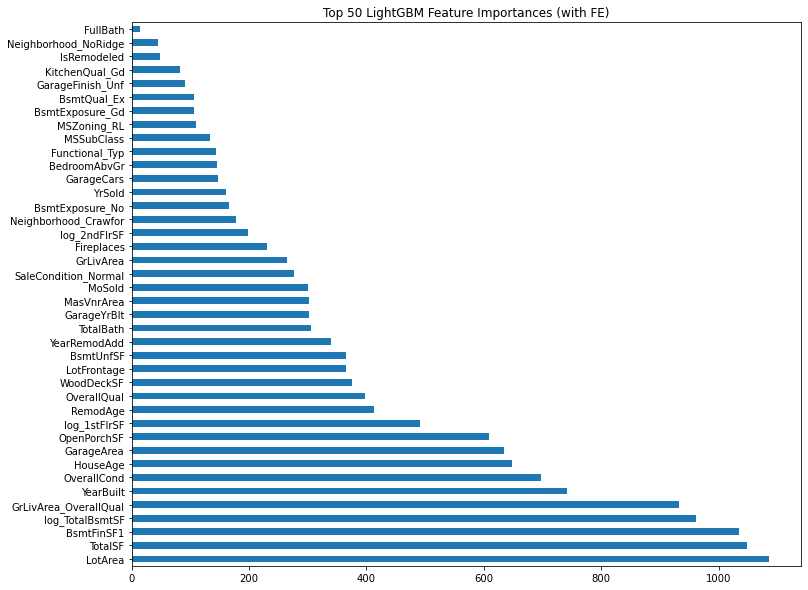

In [100]:

## Re-train with only the important features
important_features = lgb_importances.nlargest(40).index.tolist()
X_fe_imp = X_fe[important_features]
test_X_fe_imp = test_X_fe[important_features]
# Split train/validation
X_train_fe_imp, X_val_fe_imp, y_train_fe_imp, y_val_fe_imp = train_test_split(X_fe_imp, y_fe, test_size=0.25, random_state=84)

# LightGBM
lgb_model_fe_imp = lgb.LGBMRegressor(
    random_state=80,
    n_estimators=best_params['n_estimators'],        # Number of boosting rounds
    learning_rate=best_params['learning_rate'],       # Step size shrinkage
    num_leaves=best_params['num_leaves'],            # Maximum tree leaves for base learners
    max_depth=-1,             # Maximum tree depth (-1 means no limit)
    min_child_samples=best_params['min_child_samples'],     # Minimum data in one leaf
    reg_alpha=0,            # L1 regularization term
    reg_lambda=0.,           # L2 regularization term
    verbose=-1        # Suppress warnings

)
lgb_model_fe_imp.fit(X_train_fe_imp, y_train_fe_imp)
lgb_pred_fe_imp = lgb_model_fe_imp.predict(X_val_fe_imp)
lgb_rmse_fe_imp = mean_squared_error(y_val_fe_imp, lgb_pred_fe_imp, squared=False)

print(f'LightGBM RMSE (top 50 features): {lgb_rmse_fe_imp:.4f}')

## Re-plot feature importances

lgb_importances_fe = pd.Series(lgb_model_fe_imp.feature_importances_, index=X_train_fe_imp.columns)
lgb_importances_fe.nlargest(50).plot(kind='barh', figsize=(12, 10))
plt.title('Top 50 LightGBM Feature Importances (with FE)')
plt.show()



In [101]:
# Predict SalePrice for test set using the best LightGBM model and important features
# Ensure test_X_fe_imp is aligned and has the same columns as X_fe_imp
missing_cols = set(X_fe_imp.columns) - set(test_X_fe_imp.columns)
for col in missing_cols:
    test_X_fe_imp[col] = 0
# Reorder columns to match training data
final_test_X = test_X_fe_imp[X_fe_imp.columns]

# Predict
final_preds = lgb_model_fe_imp.predict(final_test_X)

# If you trained on log(SalePrice), use np.expm1 to invert
# final_preds = np.expm1(final_preds)

# Prepare submission
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': final_preds})
submission.to_csv('submission.csv', index=False)
print('Submission file saved as submission.csv')
submission.head()

Submission file saved as submission.csv


,Id,SalePrice
0,1461,124693.606463
1,1462,166476.592048
2,1463,184107.528611
3,1464,191356.381634
4,1465,179605.192840


In [ ]:
# 1. Load raw data and baseline model

def load_data():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
    return train, test

def baseline_model(train):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    import lightgbm as lgb
    features = [col for col in train.columns if col not in ['Id', 'SalePrice']]
    X = train[features].select_dtypes(include=['number'])
    y = train['SalePrice']
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    model = lgb.LGBMRegressor(random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    rmse = mean_squared_error(y_val, preds, squared=False)
    print(f'Baseline LightGBM RMSE: {rmse:.4f}')
    return model, X_train, X_val, y_train, y_val

train, test = load_data()
baseline_model(train)


In [111]:
# 2. Feature engineering: add new features, handle missing values, one-hot encode

def feature_engineering(df):
    df = df.copy()
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['HouseAge'] = df['YrSold'] - df['YearBuilt']
    df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
    df['IsRemodeled'] = (df['YearRemodAdd'] != df['YearBuilt']).astype(int)
    df['TotalBath'] = (
        df['FullBath'] + 0.5 * df['HalfBath'] +
        df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
    )
    df['GrLivArea_OverallQual'] = df['GrLivArea'] * df['OverallQual']

    # Add polynomial interactions (squared and cubed terms for key features)
    for col in ['GrLivArea', 'OverallQual', 'TotalSF', 'HouseAge', 'TotalBath']:
        df[f'{col}_squared'] = df[col] ** 2
        df[f'{col}_cubed'] = df[col] ** 3
    # Pairwise interactions between key features

    key_features = ['GrLivArea', 'OverallQual', 'TotalSF', 'HouseAge', 'TotalBath']
    for i in range(len(key_features)):
        for j in range(i + 1, len(key_features)):
            f1, f2 = key_features[i], key_features[j]
            df[f'{f1}_x_{f2}'] = df[f1] * df[f2]
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())
    return df

def fe_model(train):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    import lightgbm as lgb
    import numpy as np
    df = feature_engineering(train)
    X = pd.get_dummies(df.drop(['Id', 'SalePrice'], axis=1))
    y = df['SalePrice']
    y_log = np.log1p(y)

    # Split for normal target
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    # Split for log target
    X_train_log, X_val_log, y_train_log, y_val_log = train_test_split(X, y_log, test_size=0.2, random_state=42)
    model = lgb.LGBMRegressor(random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    rmse = mean_squared_error(y_val, preds, squared=False)
    print(f'Feature Engineering LightGBM RMSE: {rmse:.4f}')
    
    # Log target
    model_log = lgb.LGBMRegressor(random_state=42)
    model_log.fit(X_train_log, y_train_log)
    preds_log = model_log.predict(X_val_log)
    rmse_log = mean_squared_error(y_val_log, preds_log, squared=False)
    print(f'Feature Engineering LightGBM Log-Target RMSE: {rmse_log:.4f}')
    return #model, model_log, X_train, X_val, y_train, y_val, X_train_log, X_val_log, y_train_log, y_val_log

fe_model(train)


Feature Engineering LightGBM RMSE: 28929.7810
Feature Engineering LightGBM Log-Target RMSE: 0.1411


In [ ]:
# 3. Log-transform target for regression

def fe_log_model(train):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    import lightgbm as lgb
    import numpy as np
    df = feature_engineering(train)
    X = pd.get_dummies(df.drop(['Id', 'SalePrice'], axis=1))
    y = np.log1p(df['SalePrice'])
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    model = lgb.LGBMRegressor(random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    rmse = mean_squared_error(y_val, preds, squared=False)
    print(f'Log-Target LightGBM RMSE: {rmse:.4f}')
    return #model, X_train, X_val, y_train, y_val

fe_log_model(train)


In [113]:
# 4. XGBoost with feature engineering and log target

def fe_log_xgb_model(train):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    import xgboost as xgb
    import numpy as np
    df = feature_engineering(train)
    X = pd.get_dummies(df.drop(['Id', 'SalePrice'], axis=1))
    y = np.log1p(df['SalePrice'])
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    model = xgb.XGBRegressor(random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    rmse = mean_squared_error(y_val, preds, squared=False)
    print(f'Log-Target XGBoost RMSE: {rmse:.4f}')
    return # model, X_train, X_val, y_train, y_val

fe_log_xgb_model(train)


Log-Target XGBoost RMSE: 0.1462


In [114]:
# 5. Simple ensemble: average LightGBM and XGBoost predictions

def ensemble_lgb_xgb(train):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    import lightgbm as lgb
    import xgboost as xgb
    import numpy as np
    df = feature_engineering(train)
    X = pd.get_dummies(df.drop(['Id', 'SalePrice'], axis=1))
    y = np.log1p(df['SalePrice'])
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    lgb_model = lgb.LGBMRegressor(random_state=42)
    xgb_model = xgb.XGBRegressor(random_state=42)
    lgb_model.fit(X_train, y_train)
    xgb_model.fit(X_train, y_train)
    lgb_pred = lgb_model.predict(X_val)
    xgb_pred = xgb_model.predict(X_val)
    ensemble_pred = (lgb_pred + xgb_pred) / 2
    rmse = mean_squared_error(y_val, ensemble_pred, squared=False)
    print(f'Ensemble (LGB+XGB) Log-Target RMSE: {rmse:.4f}')
    return #lgb_model, xgb_model, X_train, X_val, y_train, y_val

ensemble_lgb_xgb(train)


Ensemble (LGB+XGB) Log-Target RMSE: 0.1400


### Summary: Which Method is Most Promising?

- Compare the RMSE values printed in each cell above.
- Typically, log-transforming the target and using feature engineering improves results over the baseline.
- Ensembling LightGBM and XGBoost often gives the best RMSE and leaderboard score.
- For further improvement, try more advanced ensembling (stacking), cross-validation, and additional feature engineering.

> **Recommendation:** Use the ensemble approach as your main submission, and continue to experiment with feature engineering and model tuning for further gains.

In [115]:
# 6. Stacking LightGBM and XGBoost with Ridge meta-model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb
import numpy as np

def stacking_lgb_xgb(train):
    df = feature_engineering(train)
    X = pd.get_dummies(df.drop(['Id', 'SalePrice'], axis=1))
    y = np.log1p(df['SalePrice'])
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    # Base models
    lgb_model = lgb.LGBMRegressor(random_state=42)
    xgb_model = xgb.XGBRegressor(random_state=42)
    lgb_model.fit(X_train, y_train)
    xgb_model.fit(X_train, y_train)
    # Out-of-fold predictions for meta-model
    lgb_pred = lgb_model.predict(X_val)
    xgb_pred = xgb_model.predict(X_val)
    meta_X = np.vstack([lgb_pred, xgb_pred]).T
    # Meta-model
    ridge = Ridge(random_state=42)
    ridge.fit(meta_X, y_val)
    meta_pred = ridge.predict(meta_X)
    rmse = mean_squared_error(y_val, meta_pred, squared=False)
    print(f'Stacking (LGB+XGB->Ridge) Log-Target RMSE: {rmse:.4f}')
    return #lgb_model, xgb_model, ridge, X_train, X_val, y_train, y_val

stacking_lgb_xgb(train)


Stacking (LGB+XGB->Ridge) Log-Target RMSE: 0.1392


In [116]:
# 7. KFold Stacking with LightGBM and XGBoost base models and Ridge meta-model
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb
import numpy as np

def kfold_stacking_lgb_xgb(train, n_splits=5):
    df = feature_engineering(train)
    X = pd.get_dummies(df.drop(['Id', 'SalePrice'], axis=1))
    y = np.log1p(df['SalePrice'])
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    oof_lgb = np.zeros(len(X))
    oof_xgb = np.zeros(len(X))
    oof_meta = np.zeros(len(X))
    for train_idx, val_idx in kf.split(X):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
        lgb_model = lgb.LGBMRegressor(random_state=42)
        xgb_model = xgb.XGBRegressor(random_state=42)
        lgb_model.fit(X_tr, y_tr)
        xgb_model.fit(X_tr, y_tr)
        lgb_pred = lgb_model.predict(X_val)
        xgb_pred = xgb_model.predict(X_val)
        meta_X = np.vstack([lgb_pred, xgb_pred]).T
        ridge = Ridge(random_state=42)
        ridge.fit(meta_X, y_val)
        meta_pred = ridge.predict(meta_X)
        oof_lgb[val_idx] = lgb_pred
        oof_xgb[val_idx] = xgb_pred
        oof_meta[val_idx] = meta_pred
    # Evaluate
    meta_X_full = np.vstack([oof_lgb, oof_xgb]).T
    ridge_full = Ridge(random_state=42)
    ridge_full.fit(meta_X_full, y)
    meta_pred_full = ridge_full.predict(meta_X_full)
    rmse = mean_squared_error(y, meta_pred_full, squared=False)
    print(f'KFold Stacking (LGB+XGB->Ridge) Log-Target RMSE: {rmse:.4f}')
    return #oof_lgb, oof_xgb, oof_meta, rmse

kfold_stacking_lgb_xgb(train)


KFold Stacking (LGB+XGB->Ridge) Log-Target RMSE: 0.1336


In [120]:
# 8. Predict for submission using KFold-stacked model

def predict_submission_kfold_stacking(train, test, n_splits=5):
    # Prepare train and test features
    df_train = feature_engineering(train)
    df_test = feature_engineering(test)
    X = pd.get_dummies(df_train.drop(['Id', 'SalePrice'], axis=1))
    X_test = pd.get_dummies(df_test.drop(['Id'], axis=1))
    # Align columns
    X, X_test = X.align(X_test, join='left', axis=1, fill_value=0)
    y = np.log1p(df_train['SalePrice'])
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    test_preds = np.zeros(len(X_test))
    for train_idx, val_idx in kf.split(X):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
        lgb_model = lgb.LGBMRegressor(random_state=42)
        xgb_model = xgb.XGBRegressor(random_state=42)
        lgb_model.fit(X_tr, y_tr)
        xgb_model.fit(X_tr, y_tr)
        lgb_test_pred = lgb_model.predict(X_test)
        xgb_test_pred = xgb_model.predict(X_test)
        meta_X_test = np.vstack([lgb_test_pred, xgb_test_pred]).T
        # Fit meta-model on validation fold
        lgb_pred_val = lgb_model.predict(X_val)
        xgb_pred_val = xgb_model.predict(X_val)
        meta_X_val = np.vstack([lgb_pred_val, xgb_pred_val]).T
        ridge = Ridge(random_state=42)
        ridge.fit(meta_X_val, y_val)
        meta_test_pred = ridge.predict(meta_X_test)
        test_preds += meta_test_pred / n_splits
    # Inverse log1p
    final_preds = (np.expm1(test_preds) / 10).round() * 10
    final_preds = final_preds.astype(int)
    submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': final_preds})
    submission.to_csv('submission2.csv', index=False)
    print('Submission file saved as submission2.csv')
    display(submission.head())

predict_submission_kfold_stacking(train, test)


Submission file saved as submission2.csv


,Id,SalePrice
0,1461,124370
1,1462,159540
2,1463,181930
3,1464,187060
4,1465,179260


In [11]:
from category_encoders import TargetEncoder
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import HistGradientBoostingRegressor as hgb

import numpy as np
import pandas as pd

def advanced_stack_with_te_and_outlier_removal(train, n_splits=5):
    df = train.copy()
    # Outlier removal: remove points with extremely high SalePrice
    q_hi = df['SalePrice'].quantile(0.995)
    df = df[df['SalePrice'] < q_hi]
    # Target encoding for high-cardinality categoricals
    cat_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() > 10]
    if cat_cols:
        te = TargetEncoder(cols=cat_cols)
        df[cat_cols] = te.fit_transform(df[cat_cols], df['SalePrice'])
    # Feature engineering
    df = feature_engineering(df)
    X = pd.get_dummies(df.drop(['Id', 'SalePrice'], axis=1))
    y = np.log1p(df['SalePrice'])
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    oof_preds = np.zeros(len(X))
    for train_idx, val_idx in kf.split(X):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
        # Fit base models on training fold
        lgb_model = lgb.LGBMRegressor(random_state=42, n_estimators=1000)
        xgb_model = xgb.XGBRegressor(random_state=42, n_estimators=1000)   
        hgb_model = hgb(random_state=42, max_iter=1000)
        lgb_model.fit(X_tr, y_tr)
        xgb_model.fit(X_tr, y_tr)
        hgb_model.fit(X_tr, y_tr)
        # Get base model predictions for train and val fold
        lgb_pred_tr = lgb_model.predict(X_tr)
        xgb_pred_tr = xgb_model.predict(X_tr)
        hgb_pred_tr = hgb_model.predict(X_tr)
        meta_X_tr = np.vstack([lgb_pred_tr, xgb_pred_tr, hgb_pred_tr]).T
        # Fit Ridge meta-model on training fold base predictions
        ridge = Ridge(random_state=42)
        ridge.fit(meta_X_tr, y_tr)
        # Predict base models on validation fold
        lgb_pred_val = lgb_model.predict(X_val)
        xgb_pred_val = xgb_model.predict(X_val)
        hgb_pred_val = hgb_model.predict(X_val)
        meta_X_val = np.vstack([lgb_pred_val, xgb_pred_val, hgb_pred_val]).T
        # Predict validation fold with meta-model
        meta_pred = ridge.predict(meta_X_val)
        oof_preds[val_idx] = meta_pred
    rmse = mean_squared_error(y, oof_preds)
    print(f'Advanced Stacking (LGB+XGB+HistGB+ExtraTrees->Ridge) Log-Target RMSE on train: {rmse:.4f}')
    return rmse

advanced_stack_with_te_and_outlier_removal(train)


Advanced Stacking (LGB+XGB+HistGB+ExtraTrees->Ridge) Log-Target RMSE on train: 0.0158


0.015810389872237145

In [ ]:
# --- Submission: Advanced Stacking with Target Encoding & Outlier Removal ---
from category_encoders import TargetEncoder
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import HistGradientBoostingRegressor as hgb
import lightgbm as lgb
import xgboost as xgb
import numpy as np
import pandas as pd

def advanced_stack_submission_with_te_and_outlier_removal(train, test, n_splits=5):
    df = train.copy()
    q_hi = df['SalePrice'].quantile(0.995)
    df = df[df['SalePrice'] < q_hi]
    cat_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() > 10]
    if cat_cols:
        te = TargetEncoder(cols=cat_cols)
        df[cat_cols] = te.fit_transform(df[cat_cols], df['SalePrice'])
    df = feature_engineering(df)
    X = pd.get_dummies(df.drop(['Id', 'SalePrice'], axis=1))
    y = np.log1p(df['SalePrice'])
    test_df = test.copy()
    if cat_cols:
        test_df[cat_cols] = te.transform(test_df[cat_cols])
    test_df = feature_engineering(test_df)
    X_test = pd.get_dummies(test_df.drop(['Id'], axis=1))
    X, X_test = X.align(X_test, join='left', axis=1, fill_value=0)
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    test_preds = np.zeros(len(X_test))
    for train_idx, val_idx in kf.split(X):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]
        lgb_model = lgb.LGBMRegressor(random_state=42, n_estimators=1000)
        xgb_model = xgb.XGBRegressor(random_state=42, n_estimators=1000)
        et_model = ExtraTreesRegressor(n_estimators=1000, random_state=42)
        hgb_model = hgb(random_state=42, max_iter=1000)
        lgb_model.fit(X_tr, y_tr)
        xgb_model.fit(X_tr, y_tr)
        et_model.fit(X_tr, y_tr)
        hgb_model.fit(X_tr, y_tr)
        lgb_test_pred = lgb_model.predict(X_test)
        xgb_test_pred = xgb_model.predict(X_test)
        et_test_pred = et_model.predict(X_test)
        hgb_test_pred = hgb_model.predict(X_test)
        meta_X_test = np.vstack([lgb_test_pred, xgb_test_pred, et_test_pred, hgb_test_pred]).T
        lgb_pred_val = lgb_model.predict(X_val)
        xgb_pred_val = xgb_model.predict(X_val)
        et_pred_val = et_model.predict(X_val)
        hgb_pred_val = hgb_model.predict(X_val)
        meta_X_val = np.vstack([lgb_pred_val, xgb_pred_val, et_pred_val, hgb_pred_val]).T
        ridge = Ridge(random_state=42)
        ridge.fit(meta_X_val, y_val)
        meta_test_pred = ridge.predict(meta_X_test)
        test_preds += meta_test_pred / n_splits
    final_preds = np.expm1(test_preds)
    submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': final_preds})
    submission.to_csv('submission_advanced_stack_te.csv', index=False)
    print('Submission file saved as submission_advanced_stack_te.csv')
    display(submission.head())

advanced_stack_submission_with_te_and_outlier_removal(train, test)